In [1]:
# Importing suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Initializing the dataset
data = pd.read_csv(
    "/home/amandeep/Documents/DataAnalysis/dataset/archive/winequality.csv"
)

## Detection and removal of outliers using Z - Score method


In [5]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<Axes: xlabel='volatile acidity', ylabel='Density'>

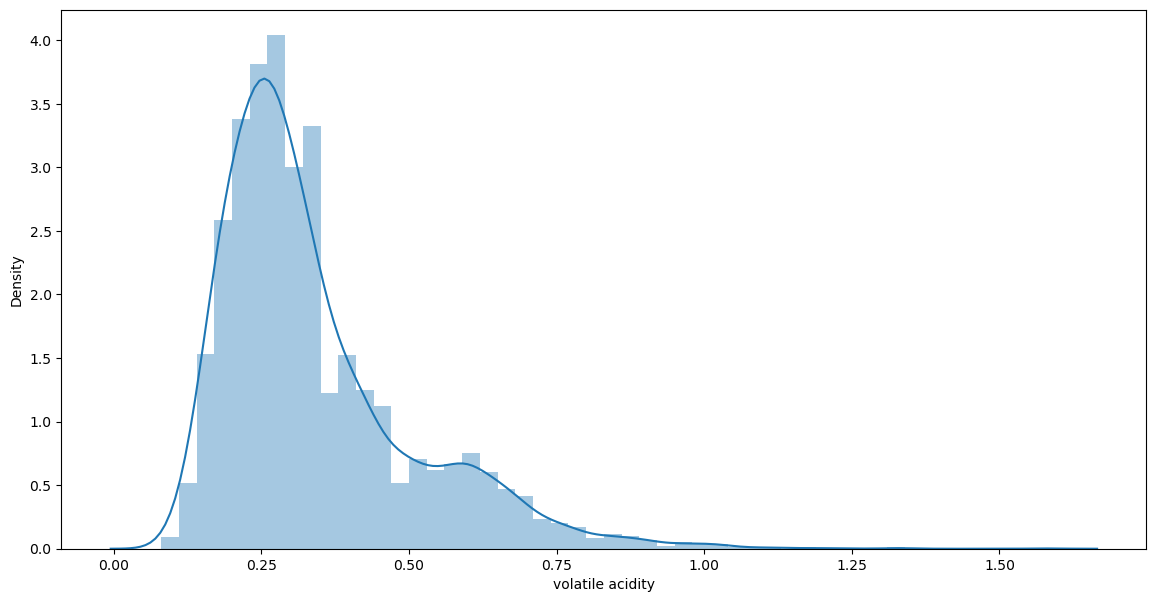

In [10]:
plt.figure(figsize=(14, 7))

sns.distplot(data["volatile acidity"])

<Axes: >

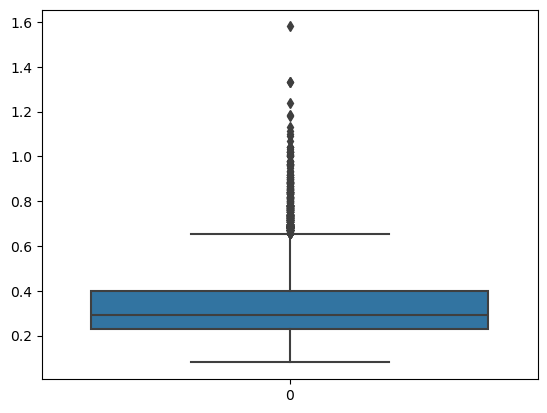

In [34]:

sns.boxplot(data["volatile acidity"])

### so from these two plot we can see that this data is having the outliers too much and is been right skewed also


So we will be using zscore method and IQR Method for treating our outliers


In [13]:
UpperLimit = (data["volatile acidity"].mean()) + (3 * data["volatile acidity"].std())

In [15]:
LowerLimit = (data["volatile acidity"].mean()) - (3 * data["volatile acidity"].std())

In [16]:
UpperLimit, LowerLimit

(0.8336381014976804, -0.15425607036807648)

#### How to see the outliers using upperlimit and lowerlimit

In [19]:
data.loc[(data["volatile acidity"] > UpperLimit) | (data["volatile acidity"] < LowerLimit), ["volatile acidity"]]

,volatile acidity
372,0.905
1476,0.850
1856,0.910
1951,1.005
2154,0.930
...,...
6413,0.840
6440,0.855
6452,0.855
6454,0.880


In [18]:
data['volatile acidity']

0       0.270
1       0.300
2       0.280
3       0.230
4       0.230
        ...  
6492    0.600
6493    0.550
6494    0.510
6495    0.645
6496    0.310
Name: volatile acidity, Length: 6497, dtype: float64

### method to remove outliers using  ZScore are 
#### - Trimming 
#### - capping

# Trimming - Delete the data

In [22]:
newData = data.loc[(data['volatile acidity'] < UpperLimit) & (data['volatile acidity'] > LowerLimit)]

In [23]:
print("New Data : ", newData.shape) 
print("Old data", data.shape)

New Data :  (6394, 13)
Old data (6497, 13)


In [24]:
# how many outliers were there 

print(len(data) - len(newData))

103


<Axes: >

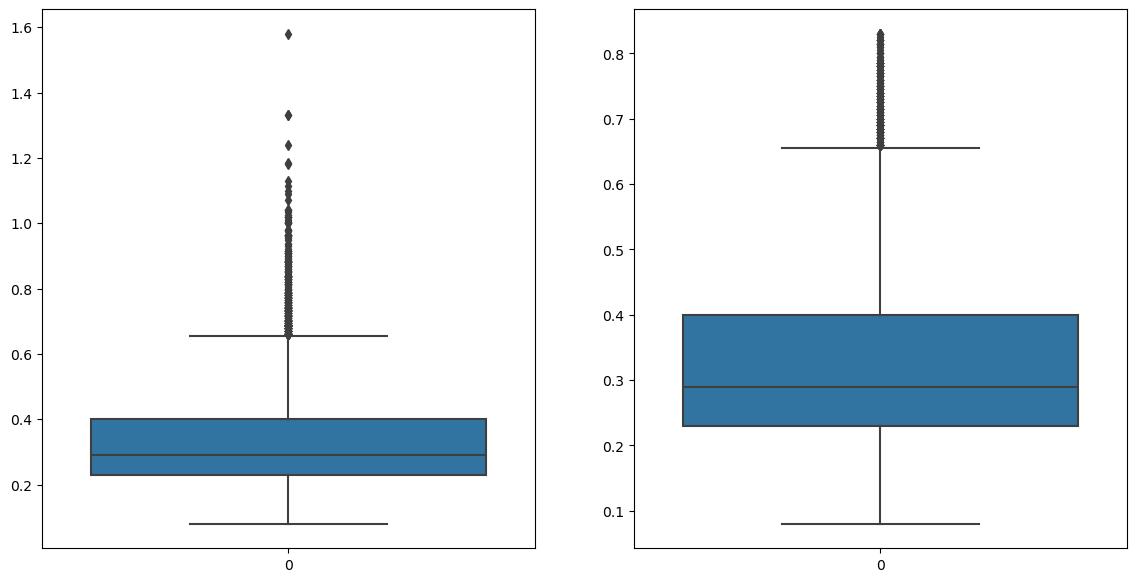

In [28]:
plt.figure(figsize=(14, 7))

plt.subplot(1,2, 1)
sns.boxplot(data['volatile acidity'])

plt.subplot(1, 2, 2)
sns.boxplot(newData['volatile acidity'])

## As we can see that , the left one is from before removing the outliers and the second one is from where the outliers were removed

### This is not perfect but still we get the modified the data not to perfection but to from where we can use this in an algorithm

# Capping 

In [29]:
TempData = data.copy()

In [31]:
TempData.loc[(TempData['volatile acidity'] > UpperLimit), 'volatile acidity'] = UpperLimit

In [32]:
TempData.loc[(TempData['volatile acidity'] < LowerLimit ), 'volatile acidity'] = LowerLimit

<Axes: >

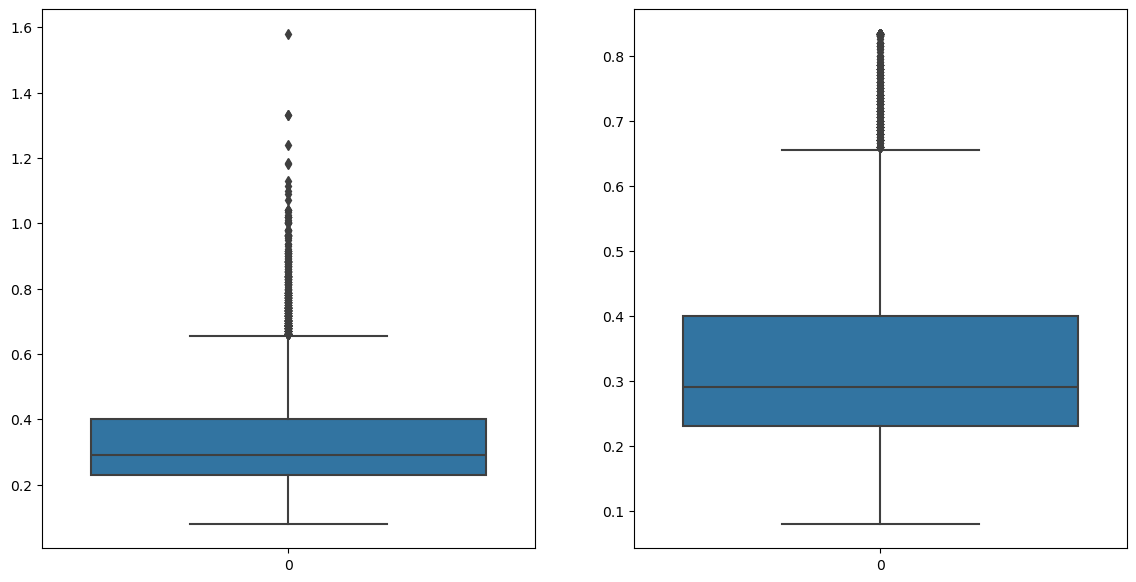

In [33]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data['volatile acidity'])

plt.subplot(1, 2, 2)
sns.boxplot(TempData['volatile acidity'])